<a href="https://colab.research.google.com/github/ali-f-alfa/Persian-Handwriting-Recognition/blob/main/Persian_Handwriting_Character_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [1]:
import numpy as np
import os
import cv2

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from PIL import Image
from scipy.ndimage import rotate
from keras import backend as K
from keras.models import Model,Sequential
from keras.layers import Input
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Reshape,GlobalAveragePooling2D,ZeroPadding2D,MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.layers import Bidirectional, LSTM
from keras.layers import Lambda, Activation, BatchNormalization,Add
# from keras.optimizers import Adam,SGD
from tensorflow.keras.optimizers import Adam,SGD
from keras.layers import Flatten
from keras.initializers import glorot_uniform
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from google.colab.patches import cv2_imshow

### Mount Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extract Dataset from Drive
# !unrar x "/content/drive/MyDrive/FinalProject/PersianCharacterRecognition/Dataset/Isolated_Letters.rar"
!unrar x "/content/drive/MyDrive/FinalProject/PersianCharacterRecognition/Dataset/Isolated_Letters_small.rar"

## Create Dataset

In [9]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [10]:
IMG_WIDTH=64
IMG_HEIGHT=64
img_folder='/content/Isolated Letters'

In [11]:
img_data, class_name =create_dataset(img_folder)
print(np.unique(class_name))
print(len(class_name))
print(len(img_data))

['ALEF_B' 'ALEF_S' 'BE' 'CHE' 'DAL' 'EIN' 'FAF' 'GAF' 'GHAF' 'GHEIN' 'HE'
 'HE2' 'HE2_S' 'JIM' 'KAF' 'KHE' 'LAM' 'MIM' 'NON' 'PE' 'RE' 'SAD' 'SE'
 'SHIN' 'SIN' 'TA' 'TE' 'VAV' 'YEH' 'ZA' 'ZAD' 'ZAL' 'ZHE' 'Ze']
16996
16996


In [12]:
print(class_name[0])
print(img_data[0][10])

GHAF
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.39215687 0.         0.         0.         0.34117648
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.77254903 0.         0.         0.         0.19215687
 0.77254903 1.         1.         1.        ]


## Model

In [13]:
model = Sequential()
model.add(tf.keras.applications.ResNet50(include_top = False,
                                         pooling = "avg",
                                         weights = None,
                                         input_shape=(64, 64, 3)))
model.add(Dense(34, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 34)                69666     
                                                                 
Total params: 23,657,378
Trainable params: 23,604,258
Non-trainable params: 53,120
_________________________________________________________________


In [14]:
from keras.preprocessing.image import ImageDataGenerator
DATA_TRAIN_PATH='/content/Isolated Letters/'
train_datagen = ImageDataGenerator()
IMG_WIDTH =64
IMG_HEIGHT =64
EPOCHS=25
BATCH_SIZE=500
train_generator  = train_datagen.flow_from_directory(
        DATA_TRAIN_PATH,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 16996 images belonging to 34 classes.


In [15]:
loss = 'categorical_crossentropy'
optimizer = 'adam'
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
H = model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=True)

Epoch 1/25
34/34 [==============================] - 74s 721ms/step - loss: 1.5266 - accuracy: 0.5724
Epoch 2/25
34/34 [==============================] - 18s 510ms/step - loss: 0.3299 - accuracy: 0.8967
Epoch 3/25
34/34 [==============================] - 18s 516ms/step - loss: 0.1279 - accuracy: 0.9600
Epoch 4/25
34/34 [==============================] - 18s 508ms/step - loss: 0.0940 - accuracy: 0.9692
Epoch 5/25
34/34 [==============================] - 17s 504ms/step - loss: 0.0687 - accuracy: 0.9782
Epoch 6/25
34/34 [==============================] - 18s 509ms/step - loss: 0.0821 - accuracy: 0.9720
Epoch 7/25
34/34 [==============================] - 18s 517ms/step - loss: 0.0612 - accuracy: 0.9798
Epoch 8/25
34/34 [==============================] - 18s 507ms/step - loss: 0.0477 - accuracy: 0.9842
Epoch 9/25
34/34 [==============================] - 17s 505ms/step - loss: 0.0478 - accuracy: 0.9853
Epoch 10/25
34/34 [==============================] - 17s 503ms/step - loss: 0.0488 - accura

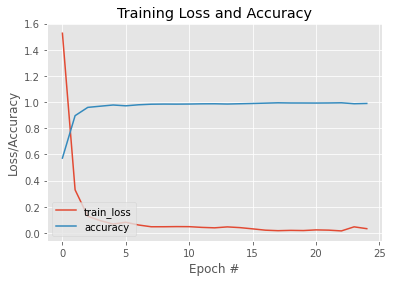

In [16]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["accuracy"], label="accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [17]:
model_json = model.to_json()
with open("/content/drive/MyDrive/FinalProject/PersianCharacterRecognition/character_resnet_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("/content/drive/MyDrive/FinalProject/PersianCharacterRecognition/character_resnet_model.h5")
print("Saved model to disk")

Saved model to disk
